# Retro — Figure 1

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
%matplotlib inline

## Load the data

In [3]:
with open('overcredited_arbocs.json', 'r') as f:
    data = json.load(f)
del data['ACR360']
del data['CAR1102']

In [4]:
with open('retro-db-light-v1.0.json', 'r') as f:
    db = json.load(f)
db = list(filter(lambda x: ~(x['id'] == 'ACR360') & ~(x['id'] == 'CAR1102'), db))

In [5]:
def get(id):
    return [x for x in db if x['id'] == id][0]

In [6]:
numbers = {
    'all': (474, 192996530.0),
    'all_forest': (130, 156069203.0),
    'compliance_ifm': (74, 131462946.0),
    'upfront_ifm': (72, 120954134.0),
}

In [7]:
numbers['analyzed'] = (len(data.keys()), np.sum([get(key)['arbocs']['issuance'] for key in data.keys()]))

## Make the plot

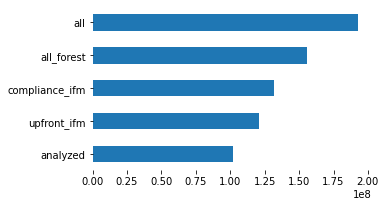

In [8]:
cats = ['analyzed', 'upfront_ifm', 'compliance_ifm', 'all_forest', 'all']

fig, ax = plt.subplots(1,1, figsize=(5,3))

ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.barh(cats, width=[numbers[c][1] for c in cats], height=0.5)

plt.savefig('Figure-1.svg')